<a href="https://colab.research.google.com/github/Noha-Magdy/AI-model-for-predicting-covid-19/blob/master/Data_analysisV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
Corona_dataset= pd.read_csv('/content/drive/My Drive/time_series_covid_19_confirmed.csv')

In [ ]:
Corona_dataset= Corona_dataset.drop(["Lat","Long"],axis = 1)

In [ ]:
#Aggregating the rows by country 
Corona_dataset_aggregated = Corona_dataset.groupby("Country/Region").sum()
Corona_dataset_aggregated.head(5)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858,861
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525,541


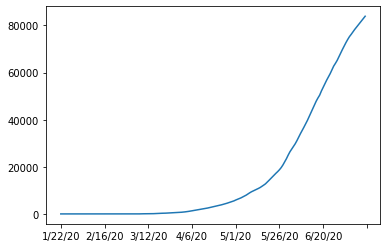

In [ ]:
Corona_dataset_aggregated.loc["Egypt"].plot()

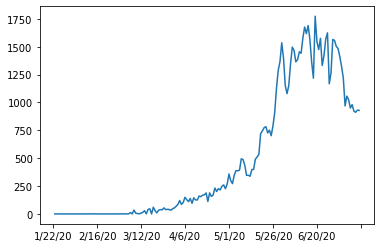

In [ ]:
#Calculating and plotting the first derivative of the curve 
Corona_dataset_aggregated.loc["Egypt"].diff().plot()

In [ ]:
#Finding the maximum infection rate for Egypt 
Corona_dataset_aggregated.loc["Egypt"].diff().max()

1774.0

In [ ]:
total_cases=pd.DataFrame()
total_cases['cumulative_cases']= Corona_dataset_aggregated.sum(axis=1)
total_cases.head()

,cumulative_cases
Country/Region,
Afghanistan,1473088
Albania,140960
Algeria,863471
Andorra,82881
Angola,12580


In [ ]:
#Create a new column which is the mximum infection rate 
countries = list(Corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries :
  max_infection_rates.append(Corona_dataset_aggregated.loc[c].diff().max())
Corona_dataset_aggregated["max_infection_rate"] = max_infection_rates

In [ ]:
Corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,915.0
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,117.0
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216,527.0
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858,861,79.0
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525,541,62.0


In [ ]:
Corona_data = pd.DataFrame(Corona_dataset_aggregated["max_infection_rate"])
Corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,117.0
Algeria,527.0
Andorra,79.0
Angola,62.0


In [ ]:
Corona_data = total_cases.join(Corona_data, how = "inner")
Corona_data.head()

,cumulative_cases,max_infection_rate
Country/Region,,
Afghanistan,1473088,915.0
Albania,140960,117.0
Algeria,863471,527.0
Andorra,82881,79.0
Angola,12580,62.0


In [ ]:
Corona_data.index[53]

'Egypt'

In [ ]:
Corona_data.loc['Egypt']

cumulative_cases      2985947.0
max_infection_rate       1774.0
Name: Egypt, dtype: float64

In [ ]:
Corona_data.shape

(188, 2)

In [ ]:
#Importing the happiness worldwide dataset
happines = pd.read_csv('/content/drive/My Drive/2020.csv')
happines.head(2) 

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741


In [ ]:
#Drop useless columns
happines_csv= happines.drop(columns=['Regional indicator', ],axis=1)   
happines_csv.head(2)

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741


In [ ]:
happines_csv.sort_values(by=['Country name'], inplace=True)
happines_csv.head(2)

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
152,Afghanistan,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236
104,Albania,4.8827,0.056116,4.992687,4.772713,9.417931,0.671070,68.708138,0.781994,-0.042309,0.896304,1.972317,0.906653,0.830484,0.846330,0.461946,0.171028,0.025361,1.640897


In [ ]:
#Changing the indices of the dataframe 
happines_csv.set_index("Country name", inplace = True)
happines_csv.head()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,,,,,,,
Afghanistan,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236
Albania,4.8827,0.056116,4.992687,4.772713,9.417931,0.671070,68.708138,0.781994,-0.042309,0.896304,1.972317,0.906653,0.830484,0.846330,0.461946,0.171028,0.025361,1.640897
Algeria,5.0051,0.044236,5.091802,4.918397,9.537965,0.803385,65.905174,0.466611,-0.121105,0.735485,1.972317,0.943856,1.143004,0.745419,0.083944,0.118915,0.129191,1.840812
Argentina,5.9747,0.053442,6.079446,5.869954,9.810955,0.900568,68.803802,0.831132,-0.194914,0.842010,1.972317,1.028466,1.372544,0.849774,0.520840,0.070100,0.060415,2.072541
Armenia,4.6768,0.058595,4.791646,4.561953,9.100476,0.757479,66.750656,0.712018,-0.138780,0.773545,1.972317,0.808262,1.034577,0.775857,0.378076,0.107226,0.104618,1.468162


In [ ]:
happines_csv.shape

(153, 18)

In [ ]:
#Joining the two Datasets 
data = Corona_data.join(happines_csv, how = "inner")
data.head()

,cumulative_cases,max_infection_rate,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Afghanistan,1473088,915.0,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236
Albania,140960,117.0,4.8827,0.056116,4.992687,4.772713,9.417931,0.671070,68.708138,0.781994,-0.042309,0.896304,1.972317,0.906653,0.830484,0.846330,0.461946,0.171028,0.025361,1.640897
Algeria,863471,527.0,5.0051,0.044236,5.091802,4.918397,9.537965,0.803385,65.905174,0.466611,-0.121105,0.735485,1.972317,0.943856,1.143004,0.745419,0.083944,0.118915,0.129191,1.840812
Argentina,2657534,3663.0,5.9747,0.053442,6.079446,5.869954,9.810955,0.900568,68.803802,0.831132,-0.194914,0.842010,1.972317,1.028466,1.372544,0.849774,0.520840,0.070100,0.060415,2.072541
Armenia,1126863,771.0,4.6768,0.058595,4.791646,4.561953,9.100476,0.757479,66.750656,0.712018,-0.138780,0.773545,1.972317,0.808262,1.034577,0.775857,0.378076,0.107226,0.104618,1.468162


In [ ]:
data.isnull().values.any()


False

In [ ]:
data.shape

(141, 20)

In [ ]:
#Check the correlation matrix 
data.corr()

,cumulative_cases,max_infection_rate,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
cumulative_cases,1.000000e+00,8.017456e-01,1.815309e-01,-2.542711e-01,1.758224e-01,1.869285e-01,2.369960e-01,1.539425e-01,2.123036e-01,3.236622e-02,-6.811764e-02,-3.587003e-02,7.878646e-17,2.369960e-01,1.539425e-01,2.123036e-01,3.236623e-02,-6.811765e-02,3.587003e-02,2.924216e-02
max_infection_rate,8.017456e-01,1.000000e+00,1.209275e-01,-2.064705e-01,1.159134e-01,1.256997e-01,1.492205e-01,1.109631e-01,1.298684e-01,6.091324e-02,-1.095533e-01,3.348128e-02,1.504851e-16,1.492205e-01,1.109631e-01,1.298684e-01,6.091324e-02,-1.095533e-01,-3.348128e-02,3.937558e-02
Ladder score,1.815309e-01,1.209275e-01,1.000000e+00,-4.508844e-01,9.995750e-01,9.995990e-01,7.816763e-01,7.770237e-01,7.916351e-01,6.073166e-01,9.914613e-02,-4.405951e-01,-8.482611e-16,7.816763e-01,7.770237e-01,7.916350e-01,6.073167e-01,9.914613e-02,4.405951e-01,4.857352e-01
Standard error of ladder score,-2.542711e-01,-2.064705e-01,-4.508844e-01,1.000000e+00,-4.246720e-01,-4.759802e-01,-5.781374e-01,-5.037941e-01,-5.899669e-01,-2.903145e-01,1.177842e-01,3.208393e-01,6.622595e-16,-5.781374e-01,-5.037941e-01,-5.899669e-01,-2.903145e-01,1.177842e-01,-3.208393e-01,1.286058e-01
upperwhisker,1.758224e-01,1.159134e-01,9.995750e-01,-4.246720e-01,1.000000e+00,9.983486e-01,7.739729e-01,7.716818e-01,7.836877e-01,6.065201e-01,1.044109e-01,-4.364173e-01,-2.477173e-16,7.739728e-01,7.716818e-01,7.836877e-01,6.065201e-01,1.044109e-01,4.364173e-01,4.968821e-01
lowerwhisker,1.869285e-01,1.256997e-01,9.995990e-01,-4.759802e-01,9.983486e-01,1.000000e+00,7.885232e-01,7.815804e-01,7.987108e-01,6.075961e-01,9.395119e-02,-4.442948e-01,2.097732e-15,7.885232e-01,7.815804e-01,7.987108e-01,6.075961e-01,9.395119e-02,4.442948e-01,4.745118e-01
Logged GDP per capita,2.369960e-01,1.492205e-01,7.816763e-01,-5.781374e-01,7.739729e-01,7.885232e-01,1.000000e+00,7.888766e-01,8.587247e-01,4.407609e-01,-1.375368e-01,-3.386514e-01,-1.972453e-15,1.000000e+00,7.888766e-01,8.587247e-01,4.407609e-01,-1.375368e-01,3.386514e-01,-4.925589e-02
Social support,1.539425e-01,1.109631e-01,7.770237e-01,-5.037941e-01,7.716818e-01,7.815804e-01,7.888766e-01,1.000000e+00,7.649773e-01,4.868377e-01,-7.137585e-02,-2.245086e-01,-1.731505e-15,7.888766e-01,1.000000e+00,7.649773e-01,4.868377e-01,-7.137585e-02,2.245086e-01,1.619174e-02
Healthy life expectancy,2.123036e-01,1.298684e-01,7.916351e-01,-5.899669e-01,7.836877e-01,7.987108e-01,8.587247e-01,7.649773e-01,1.000000e+00,4.787323e-01,-8.597477e-02,-3.614685e-01,3.229268e-15,8.587247e-01,7.649773e-01,1.000000e+00,4.787323e-01,-8.597477e-02,3.614685e-01,-6.974693e-03
Freedom to make life choices,3.236622e-02,6.091324e-02,6.073166e-01,-2.903145e-01,6.065201e-01,6.075961e-01,4.407609e-01,4.868377e-01,4.787323e-01,1.000000e+00,2.298333e-01,-4.289070e-01,-2.971206e-15,4.407609e-01,4.868376e-01,4.787323e-01,1.000000e+00,2.298333e-01,4.289070e-01,7.963506e-02


[9.09071633e-01 5.15503269e-02 1.94142934e-03 2.33515159e-03
 9.44569020e-04 1.16260368e-03 3.22103508e-03 7.13533726e-04
 4.07778182e-03 1.51274200e-03 2.86590962e-03 1.56647450e-03
 0.00000000e+00 7.03797842e-03 2.56806243e-03 3.10064393e-03
 1.23037811e-03 3.04668796e-03 2.05305929e-03]


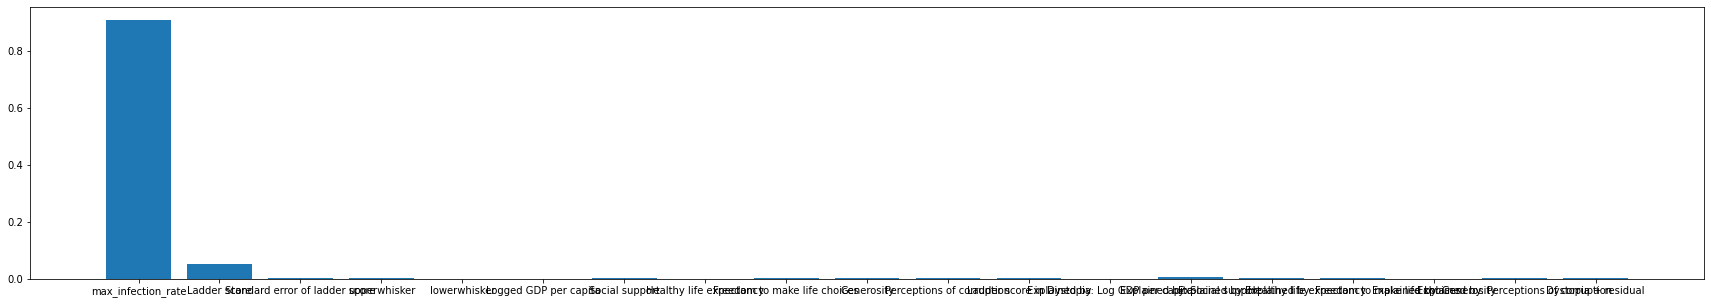

In [ ]:
#Feature Importance 
#Ensembles of decision trees, like bagged trees, random forest, and extra trees, can be used to calculate a feature importance score.
#This is common in machine learning to estimate the relative usefulness of input features when developing predictive models.

from sklearn.ensemble import RandomForestRegressor
# load data
dataframe= data
array = dataframe.values
# split into input and output
X = array[:,0:-1] #  features
y = array[:,0] # cumulative cases
# fit random forest model
model = RandomForestRegressor(n_estimators=500, random_state=0)
model.fit(X, y)
# show importance scores
print(model.feature_importances_)
# plot importance scores
names = dataframe.columns.values[1:]
ticks = [i for i in range(len(names))]
plt.figure(figsize=(30,5))
plt.bar(ticks, model.feature_importances_)
plt.xticks(ticks, names)
plt.show()

Selected Features:
max_infection_rate
Ladder score
Freedom to make life choices
Perceptions of corruption
Explained by: Social support


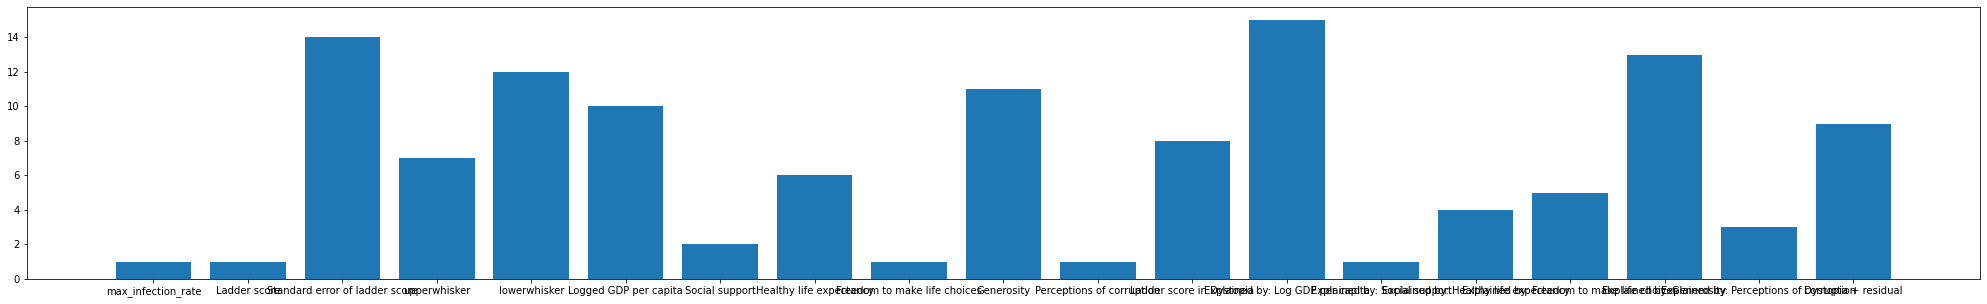

In [ ]:
#Feature Selection of Lag Variables
#We can also use feature selection to automatically identify and select those input features that are most predictive
#using Recursive Feature Selection (RFE)
from sklearn.feature_selection import RFE
# load dataset
dataframe= data
array = dataframe.values
# split into input and output
X = array[:,0:-1]
y = array[:,0]
# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=0), 5)
fit = rfe.fit(X, y)
# report selected features
print('Selected Features:')
names = dataframe.columns.values[1:]
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
# plot feature rank
names = dataframe.columns.values[1:]
ticks = [i for i in range(len(names))]
plt.figure(figsize=(35,5))
plt.bar(ticks, fit.ranking_)
plt.xticks(ticks, names)
plt.show()
#select 1,2,7

# **PCA**

**In this section I'm trying to apply PCA on happiness dataset worldwide**

In [ ]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
%matplotlib inline

In [ ]:
f_data= data[['cumulative_cases', 'max_infection_rate'	,'Ladder score', 'Freedom to make life choices', 'Perceptions of corruption', 'Explained by: Social support']]
f_data.head(2)

,cumulative_cases,max_infection_rate,Ladder score,Freedom to make life choices,Perceptions of corruption,Explained by: Social support
Afghanistan,1473088,915.0,2.5669,0.396573,0.933687,0.356434
Albania,140960,117.0,4.8827,0.781994,0.896304,0.830484


In [ ]:
f_data= f_data.reset_index()
f_data= f_data.rename(columns={'index':'country'})
f_data[f_data['country']=='Egypt']

,country,cumulative_cases,max_infection_rate,Ladder score,Freedom to make life choices,Perceptions of corruption,Explained by: Social support
37,Egypt,2985947,1774.0,4.1514,0.708354,0.787727,0.98254


In [ ]:
X = f_data.iloc[:,1:].values 
Y = f_data.iloc[:,0].values

In [ ]:
# do the standardization to bring all the feature spaces with mean = 0 and variance = 1
X_std = StandardScaler().fit_transform(X)

In [ ]:
pca = PCA(n_components=2) 
# Here we can also give the percentage as a paramter to the PCA function as pca = PCA(.95). .95 means that we want to include 95% of the variance. Hence PCA will return the no of components which describe 95% of the variance. However we know from above computation that 2 components are enough so we have passed the 2 components.
principalComponents = pca.fit_transform(X_std) 
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5) # prints the top 5 rows

,principal component 1,principal component 2
0,4.824718,1.166631
1,1.341154,-0.135848
2,1.635652,0.196473
3,-0.607161,-0.013357
4,1.078792,-0.059548


In [ ]:
principalDf['country']= f_data['country']
principalDf

,principal component 1,principal component 2,country
0,4.824718,1.166631,Afghanistan
1,1.341154,-0.135848,Albania
2,1.635652,0.196473,Algeria
3,-0.607161,-0.013357,Argentina
4,1.078792,-0.059548,Armenia
...,...,...,...
136,0.866588,-0.080198,Venezuela
137,-0.424623,-0.731605,Vietnam
138,1.950401,0.088175,Yemen
139,1.500286,-0.182526,Zambia


In [ ]:
principalDf[principalDf['country']=='Egypt']

,principal component 1,principal component 2,country
37,1.384841,0.297347,Egypt


In [ ]:
principalDf[principalDf['country']=='Iraq']

,principal component 1,principal component 2,country
58,1.388365,0.393825,Iraq


In [ ]:
principalDf[principalDf['country']=='Iran']

,principal component 1,principal component 2,country
57,0.945976,1.563539,Iran


# **Note**
we can get the sorted countries that are close to Egypt not just Iraq as one country 

In [ ]:
##Applying L2 distance to get the colsest country to Egypt
from scipy.spatial import distance
def getcountry(df):
  d_min = np.inf
  min_i = 0
  for index,i in enumerate(df):
    d = distance.euclidean(df[37], i)
    if d < d_min and index!=37 :
      d_min = d
      min_i = index
  return d_min, min_i 

In [ ]:
#principalDf= principalDf.drop(["country"],axis = 1)
print(getcountry(principalComponents))

(0.09654313820157683, 58)


In [ ]:
f_data.iloc[58]

country                             Iraq
cumulative_cases                 1823848
max_infection_rate                  2848
Ladder score                      4.7848
Freedom to make life choices    0.633183
Perceptions of corruption       0.822262
Explained by: Social support     1.01147
Name: 58, dtype: object

In [ ]:
f_data.iloc[37]

country                            Egypt
cumulative_cases                 2985947
max_infection_rate                  1774
Ladder score                      4.1514
Freedom to make life choices    0.708354
Perceptions of corruption       0.787727
Explained by: Social support     0.98254
Name: 37, dtype: object

with population

In [ ]:
population_dataset= pd.read_csv('/content/drive/My Drive/population_by_country_2020.csv')
population_dataset.head(2)

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1438207241,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1377233523,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %


In [ ]:
population_dataset= population_dataset[['Country (or dependency)', 'Population (2020)']]
population_dataset.sort_values(by=['Country (or dependency)'], inplace=True)
population_dataset.head(5)

,Country (or dependency),Population (2020)
36,Afghanistan,38742911
139,Albania,2878420
32,Algeria,43685618
209,American Samoa,55215
202,Andorra,77240


In [ ]:
population_dataset= population_dataset.reset_index()
population_dataset= population_dataset.drop(["index"], axis=1)
population_dataset.head(3)

,Country (or dependency),Population (2020)
0,Afghanistan,38742911
1,Albania,2878420
2,Algeria,43685618


In [ ]:
population_dataset.shape

(235, 2)

In [ ]:
population_dataset= population_dataset.set_index('Country (or dependency)')
population_dataset.head(2)

,Population (2020)
Country (or dependency),
Afghanistan,38742911
Albania,2878420


In [ ]:
f_data2= data[['cumulative_cases', 'max_infection_rate'	,'Ladder score', 'Freedom to make life choices', 'Perceptions of corruption', 'Explained by: Social support']]
f_data2.head(3)

,cumulative_cases,max_infection_rate,Ladder score,Freedom to make life choices,Perceptions of corruption,Explained by: Social support
Afghanistan,1473088,915.0,2.5669,0.396573,0.933687,0.356434
Albania,140960,117.0,4.8827,0.781994,0.896304,0.830484
Algeria,863471,527.0,5.0051,0.466611,0.735485,1.143004


In [ ]:
f_data2= f_data2.reset_index()
f_data2= f_data2.rename(columns={'index':'country'})
f_data2= f_data2.set_index('country')
f_data2.head(2)

,cumulative_cases,max_infection_rate,Ladder score,Freedom to make life choices,Perceptions of corruption,Explained by: Social support
country,,,,,,
Afghanistan,1473088,915.0,2.5669,0.396573,0.933687,0.356434
Albania,140960,117.0,4.8827,0.781994,0.896304,0.830484


In [ ]:
#Joining the two Datasets 
data2 = f_data2.join(population_dataset, how = "inner")
data2.head()

,cumulative_cases,max_infection_rate,Ladder score,Freedom to make life choices,Perceptions of corruption,Explained by: Social support,Population (2020)
Afghanistan,1473088,915.0,2.5669,0.396573,0.933687,0.356434,38742911
Albania,140960,117.0,4.8827,0.781994,0.896304,0.830484,2878420
Algeria,863471,527.0,5.0051,0.466611,0.735485,1.143004,43685618
Argentina,2657534,3663.0,5.9747,0.831132,0.842010,1.372544,45111229
Armenia,1126863,771.0,4.6768,0.712018,0.773545,1.034577,2962137


PCA

In [ ]:
data2= data2.reset_index()
data2= data2.rename(columns={'index':'country'})
data2[data2['country']=='Egypt']

,country,cumulative_cases,max_infection_rate,Ladder score,Freedom to make life choices,Perceptions of corruption,Explained by: Social support,Population (2020)
35,Egypt,2985947,1774.0,4.1514,0.708354,0.787727,0.98254,101930276


In [ ]:
data2= data2.set_index('country')
data2.head(2)

,cumulative_cases,max_infection_rate,Ladder score,Freedom to make life choices,Perceptions of corruption,Explained by: Social support,Population (2020)
country,,,,,,,
Afghanistan,1473088,915.0,2.5669,0.396573,0.933687,0.356434,38742911
Albania,140960,117.0,4.8827,0.781994,0.896304,0.830484,2878420


In [ ]:
X = data2.iloc[:,1:].values 
Y = data2.iloc[:,0].values
X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=2) 
# Here we can also give the percentage as a paramter to the PCA function as pca = PCA(.95). .95 means that we want to include 95% of the variance. Hence PCA will return the no of components which describe 95% of the variance. However we know from above computation that 2 components are enough so we have passed the 2 components.
principalComponents = pca.fit_transform(X_std) 
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
principalDf.head(3) # prints the top 5 rows

,principal component 1,principal component 2
0,4.950339,-0.240999
1,1.263464,-0.319577
2,1.615708,-0.463302


In [ ]:
data2= data2.reset_index()
data2.head(2)

,country,cumulative_cases,max_infection_rate,Ladder score,Freedom to make life choices,Perceptions of corruption,Explained by: Social support,Population (2020)
0,Afghanistan,1473088,915.0,2.5669,0.396573,0.933687,0.356434,38742911
1,Albania,140960,117.0,4.8827,0.781994,0.896304,0.830484,2878420


In [ ]:
principalDf['country']= data2['country']
principalDf.head(3)

,principal component 1,principal component 2,country
0,4.950339,-0.240999,Afghanistan
1,1.263464,-0.319577,Albania
2,1.615708,-0.463302,Algeria


In [ ]:
principalDf[principalDf['country']=='Egypt']

,principal component 1,principal component 2,country
35,1.445918,0.153445,Egypt


In [ ]:
principalDf[principalDf['country']=='Slovenia']

,principal component 1,principal component 2,country
113,-1.16287,-0.965644,Slovenia


In [ ]:
principalDf[principalDf['country']=='Iraq']

,principal component 1,principal component 2,country
56,1.393204,0.345444,Iraq


In [ ]:
principalDf[principalDf['country']=='Iran']

,principal component 1,principal component 2,country
55,0.899671,1.492954,Iran


In [ ]:
##Applying L2 distance to get the colsest country to Egypt
from scipy.spatial import distance
def getcountry(df):
  d_min = np.inf
  min_i = 0
  for index,i in enumerate(df):
    d = distance.euclidean(df[37], i)
    if d < d_min and index!=37 :
      d_min = d
      min_i = index
  return d_min, min_i 
print(getcountry(principalComponents))

(0.12924221419293036, 113)


In [ ]:
data2.iloc[113]

country                         Slovenia
cumulative_cases                  160299
max_infection_rate                    70
Ladder score                      6.3634
Freedom to make life choices    0.936143
Perceptions of corruption       0.817071
Explained by: Social support     1.46468
Population (2020)                2078881
Name: 113, dtype: object

In [ ]:
data2.iloc[35]

country                             Egypt
cumulative_cases                  2985947
max_infection_rate                   1774
Ladder score                       4.1514
Freedom to make life choices     0.708354
Perceptions of corruption        0.787727
Explained by: Social support      0.98254
Population (2020)               101930276
Name: 35, dtype: object